In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Concrete_Data_Yeh.csv')
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
data.shape

(1030, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


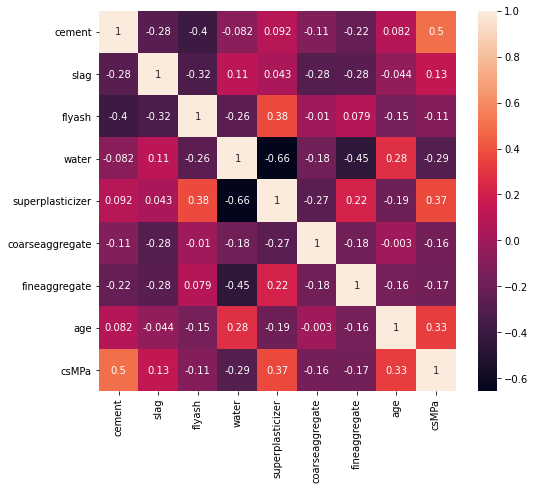

In [6]:
plt.figure(figsize=(8,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [38]:
corr_matrix = data.corr()
corr_matrix["csMPa"].sort_values(ascending = False)

csMPa               1.000000
cement              0.497832
superplasticizer    0.366079
age                 0.328873
slag                0.134829
flyash             -0.105755
coarseaggregate    -0.164935
fineaggregate      -0.167241
water              -0.289633
Name: csMPa, dtype: float64

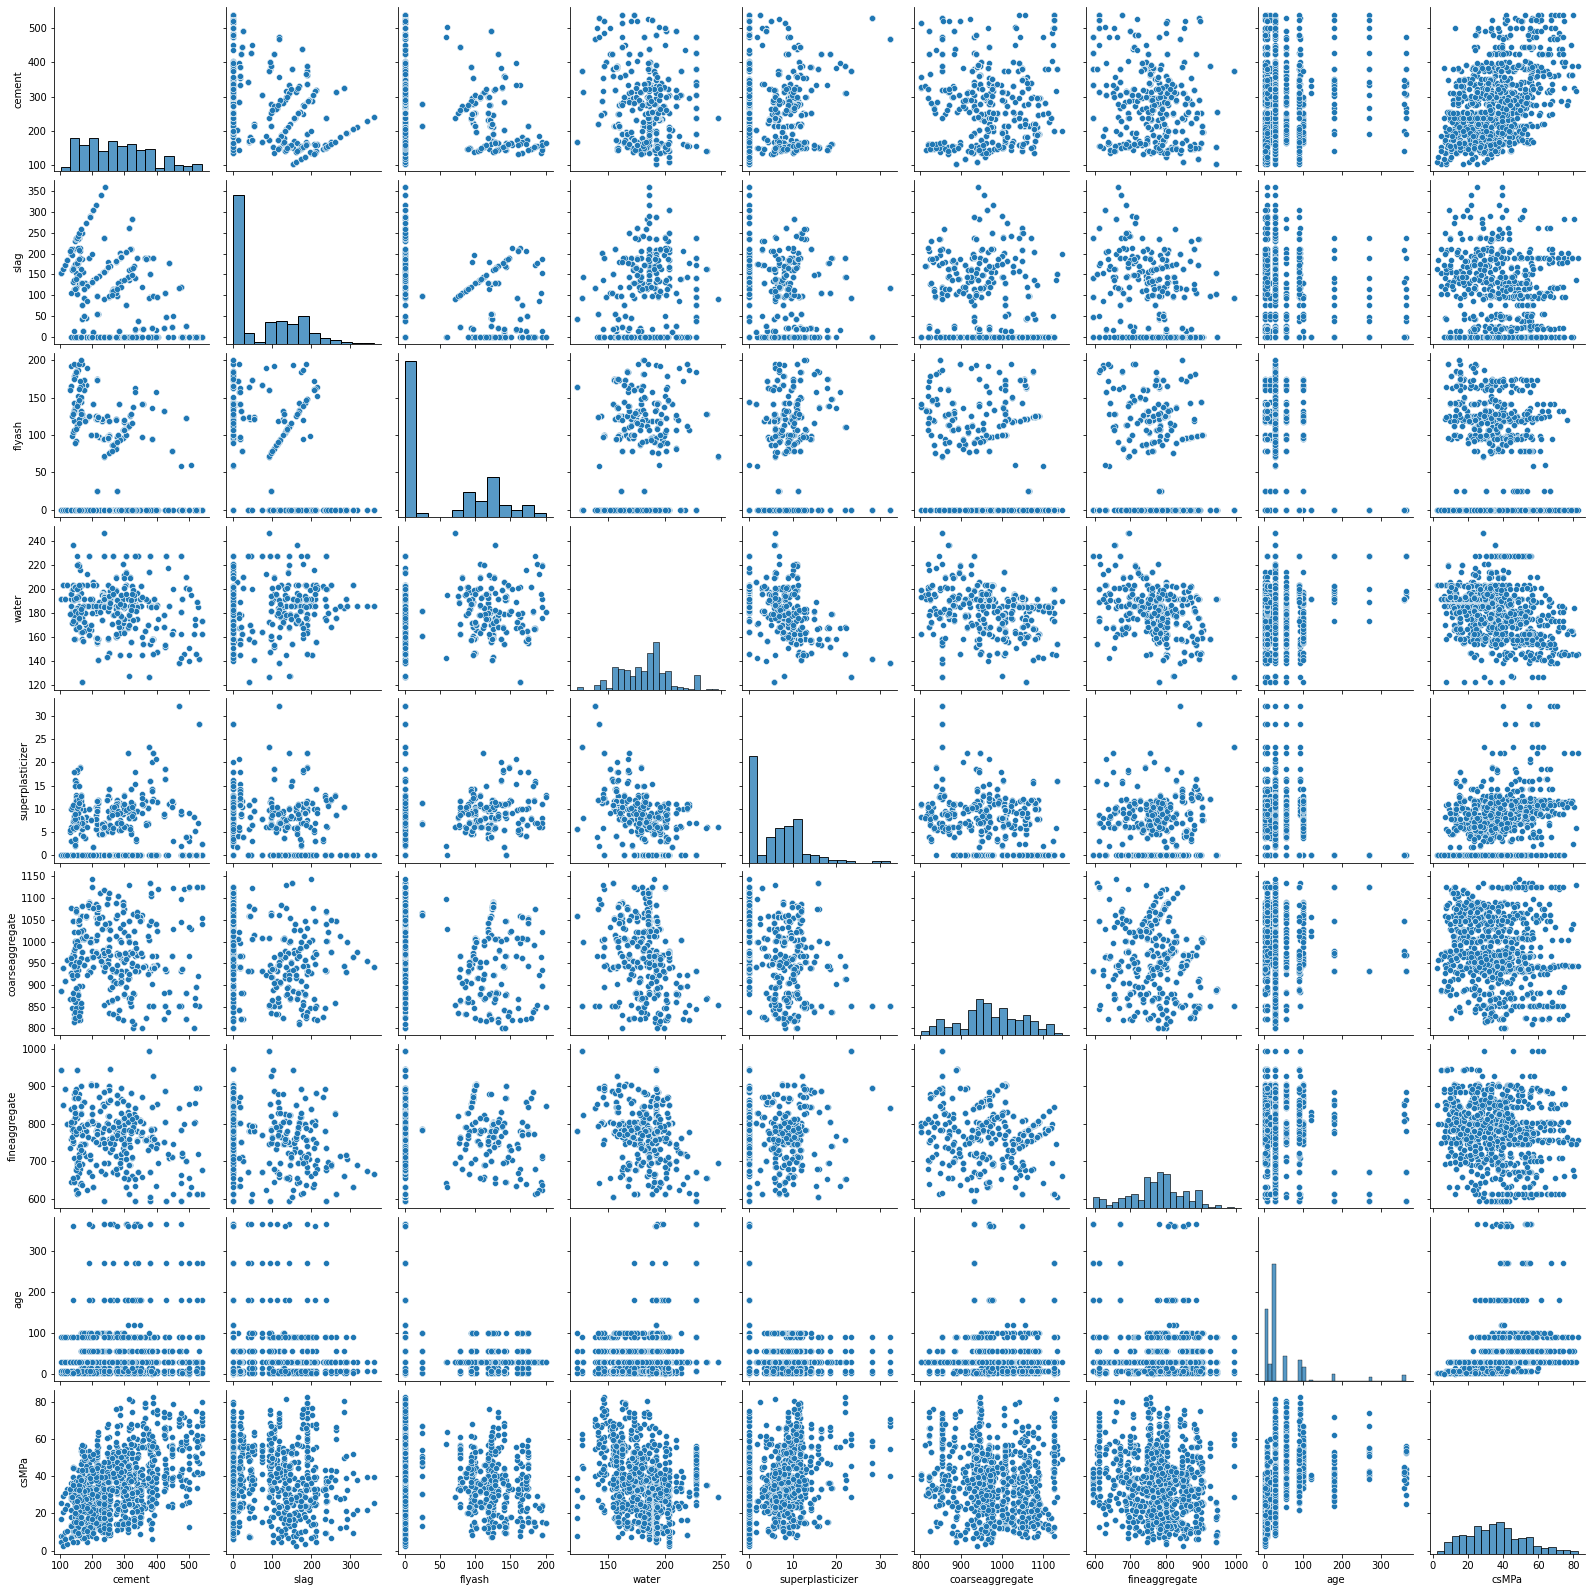

In [8]:
# Checking the pairplot.
sns.pairplot(data)
plt.show()

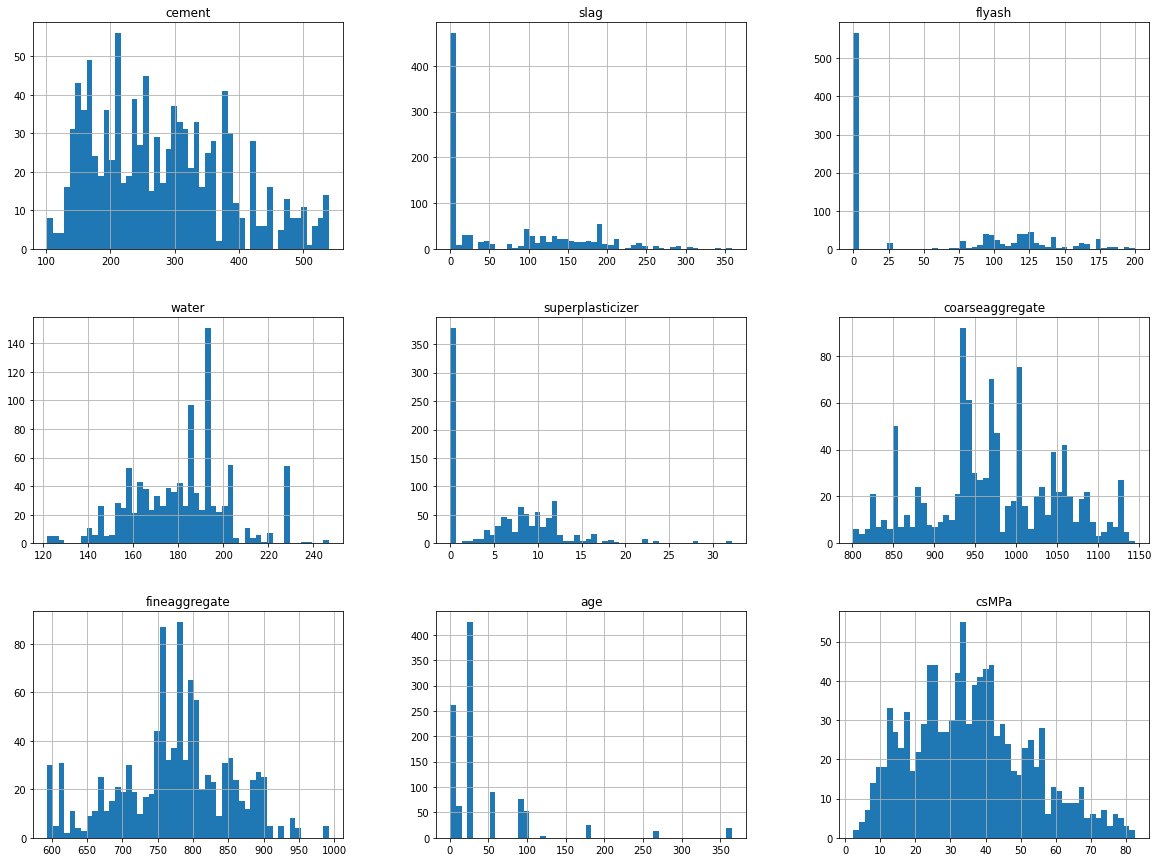

In [9]:
# Hists
data.hist(bins = 50, figsize = (20, 15))
plt.show()

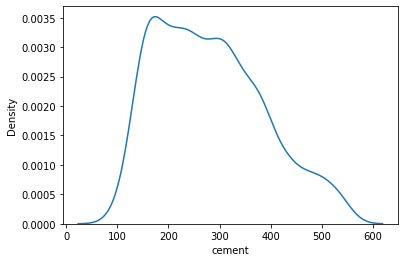

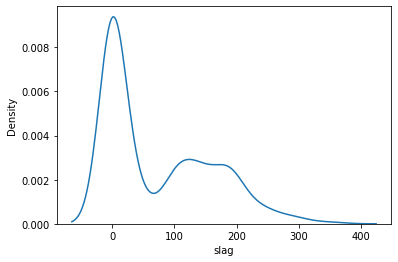

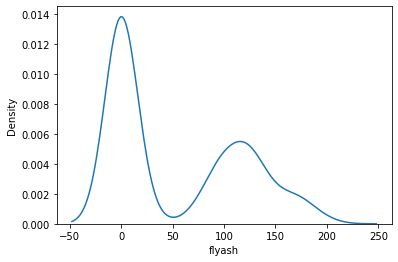

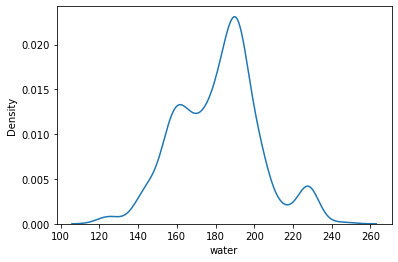

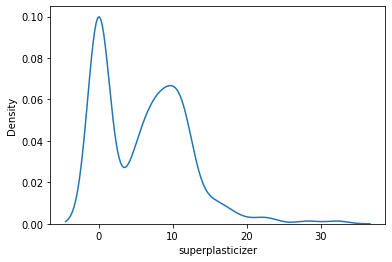

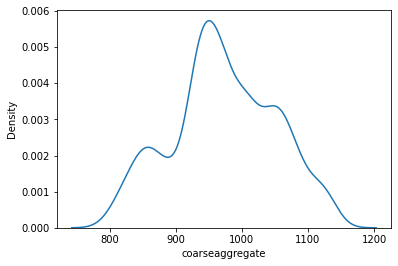

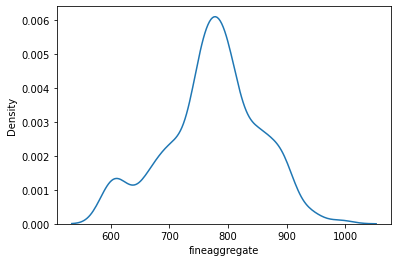

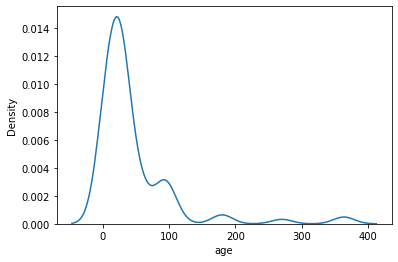

In [10]:
# Checking the distribution of the data
for i in data.iloc[:,:-1].columns:
    sns.kdeplot(data[i])
    plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [12]:
data.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

In [13]:
to_drop = ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age']
X, y = data[to_drop].copy(), data['csMPa'].copy()
print(X.shape, y.shape)

(1030, 8) (1030,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lin_reg = LinearRegression(copy_X=True ,normalize=True).fit(X_train, y_train);

In [17]:
some_data = X_test.iloc[:5]
some_labels = y_test.iloc[:5]
#some_data_prepared = 

print("Actual - Predicted")
for exp, act in zip(some_labels.values, lin_reg.predict(some_data)):
    print('{:.0f} {:.0f} ({:+.2f}%)'.format(exp, act, (act - exp) * 100/exp))

Actual - Predicted
53 60 (+12.75%)
56 52 (-6.90%)
74 64 (-14.72%)
35 52 (+46.11%)
11 17 (+63.38%)


In [18]:
from sklearn import metrics

In [19]:
print('MAE:', metrics.mean_absolute_error(y_test, lin_reg.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, lin_reg.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lin_reg.predict(X_test))))

MAE: 7.745559243921436
MSE: 95.97094009110688
RMSE: 9.796475901624364


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_new = (X - mean)/std
    return X_new, mean, std

In [22]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [23]:
def hypothesis(X, theta):
    h_thetha = np.dot(X, theta)
    return h_thetha

In [24]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    J = sum((hypothesis(X, theta) - y) ** 2)/(2*m)
    return J

In [25]:
def derivative(X, y, theta):
    m = X.shape[0]
    d_thetha = np.dot(hypothesis(X,theta) - y, X) / m
    return d_thetha

In [26]:
def gradient_descent(X, y, theta, alpha, eps = 0.005, numiters = 1500, print_J = True):
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    i = 0
    while (True):
        delta = derivative(X, y, theta)
        theta = theta - delta * alpha
        J = cost_function(X, y, theta)
        J_history.append(J)
        i+=1
        if print_J == True:
            print(J)
        if ((abs(J_history[-1] - J_history[-2]) < eps) or (i > numiters)):
            break
        
    return theta, J_history

In [27]:
def Predict(X,mean,std,theta):
    X =(X-mean)/std;
    X = prepare_X(X)
    predicted =hypothesis(X,theta);
    return predicted

In [28]:
X_train_norm, mean, std = normalize(X_train)
print('mean: ', mean.shape)
print('std: ', std.shape)
X_prep = prepare_X(X_train_norm)
y_prep = y_train[:]
theta = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])

mean:  (8,)
std:  (8,)


In [29]:
print('X_prep: {}'.format(X_prep.shape))
print('y_prep: {}'.format(y_prep.shape))
print(cost_function(X_prep, y_prep, theta))

X_prep: (824, 9)
y_prep: (824,)
784.9364040048545


In [30]:
alpha = 0.01
eps = 0.00001
numiters = 2000
new_theta, Js = gradient_descent(X_prep, y_prep, theta, alpha, eps, numiters, print_J=False)
print("new thata shape:", new_theta.shape)
print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1]))
print(cost_function(X_prep, y_prep, new_theta))

new thata shape: (9,)
Theta 0: 35.8578640115079; Theta 1: 9.719143550688768
56.01606347043359


In [31]:
some_data = X_test.iloc[:5]
some_labels = y_test.iloc[:5]
some_data_prepared = prepare_X(some_data)

print("Actual - Predicted")
for exp, act in zip(some_labels.values, Predict(some_data, mean, std, new_theta)):
    print('{:.0f} {:.0f} ({:+.2f}%)'.format(exp, act, (act - exp) * 100/exp))

Actual - Predicted
53 60 (+13.77%)
56 51 (-8.32%)
74 64 (-14.46%)
35 51 (+43.88%)
11 17 (+62.51%)


In [32]:
X_test_prep = prepare_X(X_test)
X_test_proc = (X_test.copy() - mean) / std
X_test_proc = prepare_X(X_test_proc)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100

#print('X: ', X_test_prep.shape, 'y_actual: ', y_test.shape, 'y_pred: ', y_test_pred.shape)
#print('Rell dif:\n', rel_diff)

#res = pd.DataFrame({'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
#print(res)
print(cost_function(X_test_proc, y_test, new_theta))

48.359902196344265


In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, Predict(X_test, mean, std, new_theta)))
print('MSE:', metrics.mean_squared_error(y_test, Predict(X_test, mean, std, new_theta)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Predict(X_test, mean, std, new_theta))))

MAE: 7.8380883710177915
MSE: 96.7198043926886
RMSE: 9.834622737689973
